
# <center>Exercise - Audio Processing

---
- **Nama :** Zefanya Danovanta Tarigan
- **NIM :** 122140101
- **Mata Kuliah :** Sistem & Teknologi Multimedia

### Soal 1
- Rekamlah suara Anda sendiri selama 25 detik dimana anda membaca sebuah teks berita.
- Dalam 25 detik rekaman tersebut, anda harus merekam:
    - 5 detik pertama: suara sangat pelan dan berbisik
    - 5 detik kedua: suara normal
    - 5 detik ketiga: suara keras
    - 5 detik keempat: suara cempreng (dibuat-buat cempreng)
    - 5 detik terakhir: suara berteriak
- Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
- Visualisasikan waveform dan spektogram dari rekaman suara anda
- Sertakan penjelasan singkat mengenai hasil visualisasi tersebut.
- Lakukan resampling pada file audio anda kemudian bandingkan kualitas dan durasinya.

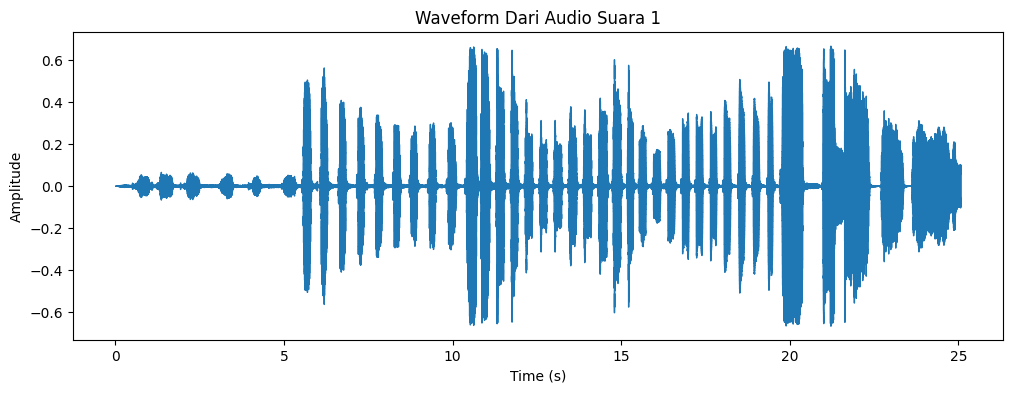

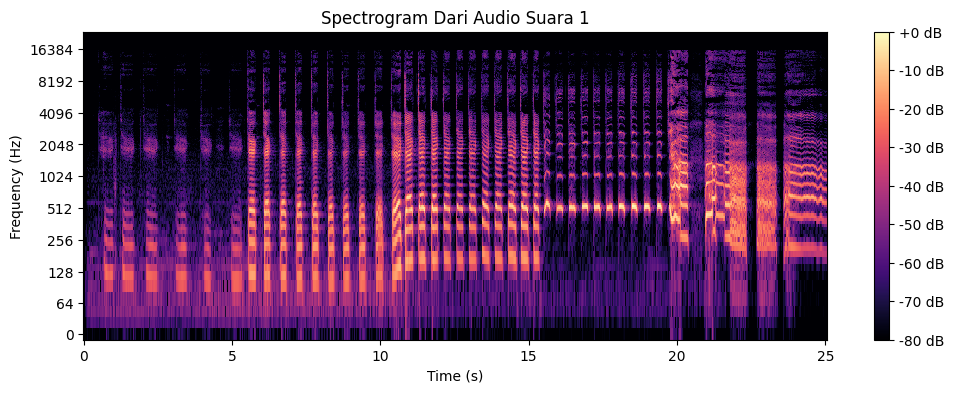

In [4]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

audioSoal1 = os.path.join('dataset', 'soal1.wav')
y, sr = librosa.load(audioSoal1, sr=None)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Dari Audio Suara 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Dari Audio Suara 1')
plt.xlabel('Time (s)')  
plt.ylabel('Frequency (Hz)')
plt.show()

**Analisis :** Pada Grafik Waveform, terlihat suara bisik-bisik memiliki nilai amplitudo kecil (hampir 0) , lu pada suara normal terlihat amplitudo mulai meningkat (diatas 0.5). Suara cempreng dan suara teriak juga terlihat amplitudo nya lebih tinggi menandakan suara memiliki volume lebih keras. lalu pada grafik spectogram, terlihat suara bisik-bisik tidak terlalu mencolok dan memiliki warna yang gelap. Pada suara normal terlihat lebih terang karena suara lebih terdengar. Pada suara cempreng, frekuensi menonjol dari frekuensi tengah sampai tinggi. Pada suara keras dan berteriak terlihat warnanya lebih terang menandakan suara terdengar lebih keras dari yang lain, dapat dilihat dari ketinggian frekuensi pada sumbu y.

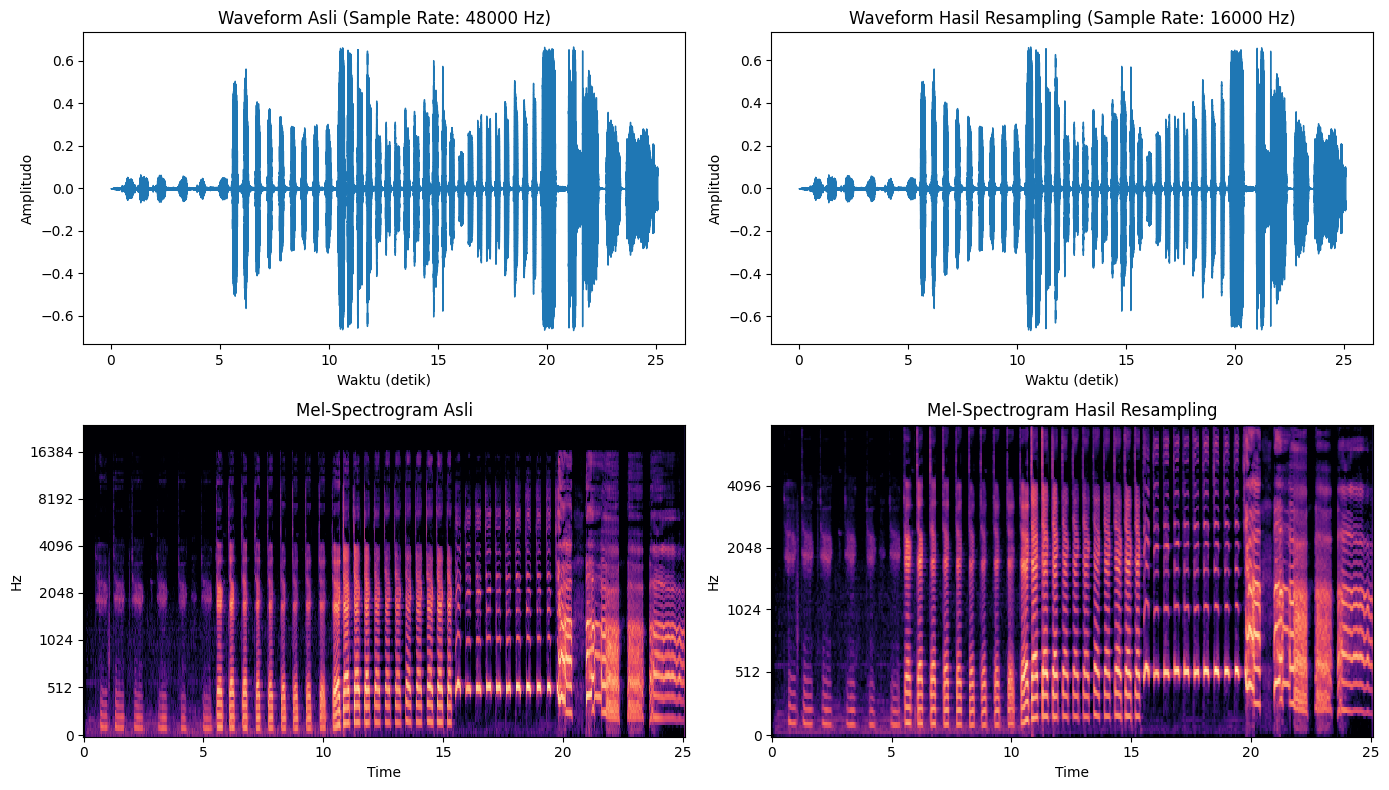

In [6]:
target_sr = 16000  # contoh target 16 kHz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform Asli (Sample Rate: {sr} Hz)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")

plt.subplot(2, 2, 2)
librosa.display.waveshow(y_resampled, sr=target_sr)
plt.title(f"Waveform Hasil Resampling (Sample Rate: {target_sr} Hz)")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")

plt.subplot(2, 2, 3)
S_orig = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=sr/2)
librosa.display.specshow(librosa.power_to_db(S_orig, ref=np.max),
                         sr=sr, x_axis='time', y_axis='mel', fmax=sr/2)
plt.title("Mel-Spectrogram Asli")

plt.subplot(2, 2, 4)
S_resampled = librosa.feature.melspectrogram(y=y_resampled, sr=target_sr, n_mels=128, fmax=target_sr/2)
librosa.display.specshow(librosa.power_to_db(S_resampled, ref=np.max),
                         sr=target_sr, x_axis='time', y_axis='mel', fmax=target_sr/2)
plt.title("Mel-Spectrogram Hasil Resampling")

plt.tight_layout()
plt.show()

**Analisis :** Audio asli memiliki sampel sebesar 48.000 Hz. lalu dilakukan proses downsampling menurunkan laju sampel menjadi 16.000 Hz. Proses ini menyebabkan penurunan kualitas audio karena sebagian komponen frekuensi tinggi dipangkas—khususnya frekuensi di atas 8 kHz hingga sekitar 22 kHz menjadi hilang atau sangat berkurang.

### Soal 2
- Rekam suara Anda berbicara di sekitar objek yang berisik (seperti kipas angin, AC, atau mesin).
    - Rekaman tersebut harus berdurasi kurang lebih 10 detik.
    - Rekam dalam format WAV (atau konversikan ke WAV sebelum dimuat ke notebook ini).
- Gunakan filter equalisasi (high-pass, low-pass, dan band-pass) untuk menghilangkan noise pada rekaman tersebut.
- Lakukan eksperimen dengan berbagai nilai frekuensi cutoff (misalnya 500 Hz, 1000 Hz, 2000 Hz).
- Visualisasikan hasil dari tiap filter dan bandingkan spektrogramnya.
- Jelaskan:
    - Jenis noise yang muncul pada rekaman Anda
    - Filter mana yang paling efektif untuk mengurangi noise tersebut
    - Nilai cutoff yang memberikan hasil terbaik
    - Bagaimana kualitas suara (kejelasan ucapan) setelah proses filtering

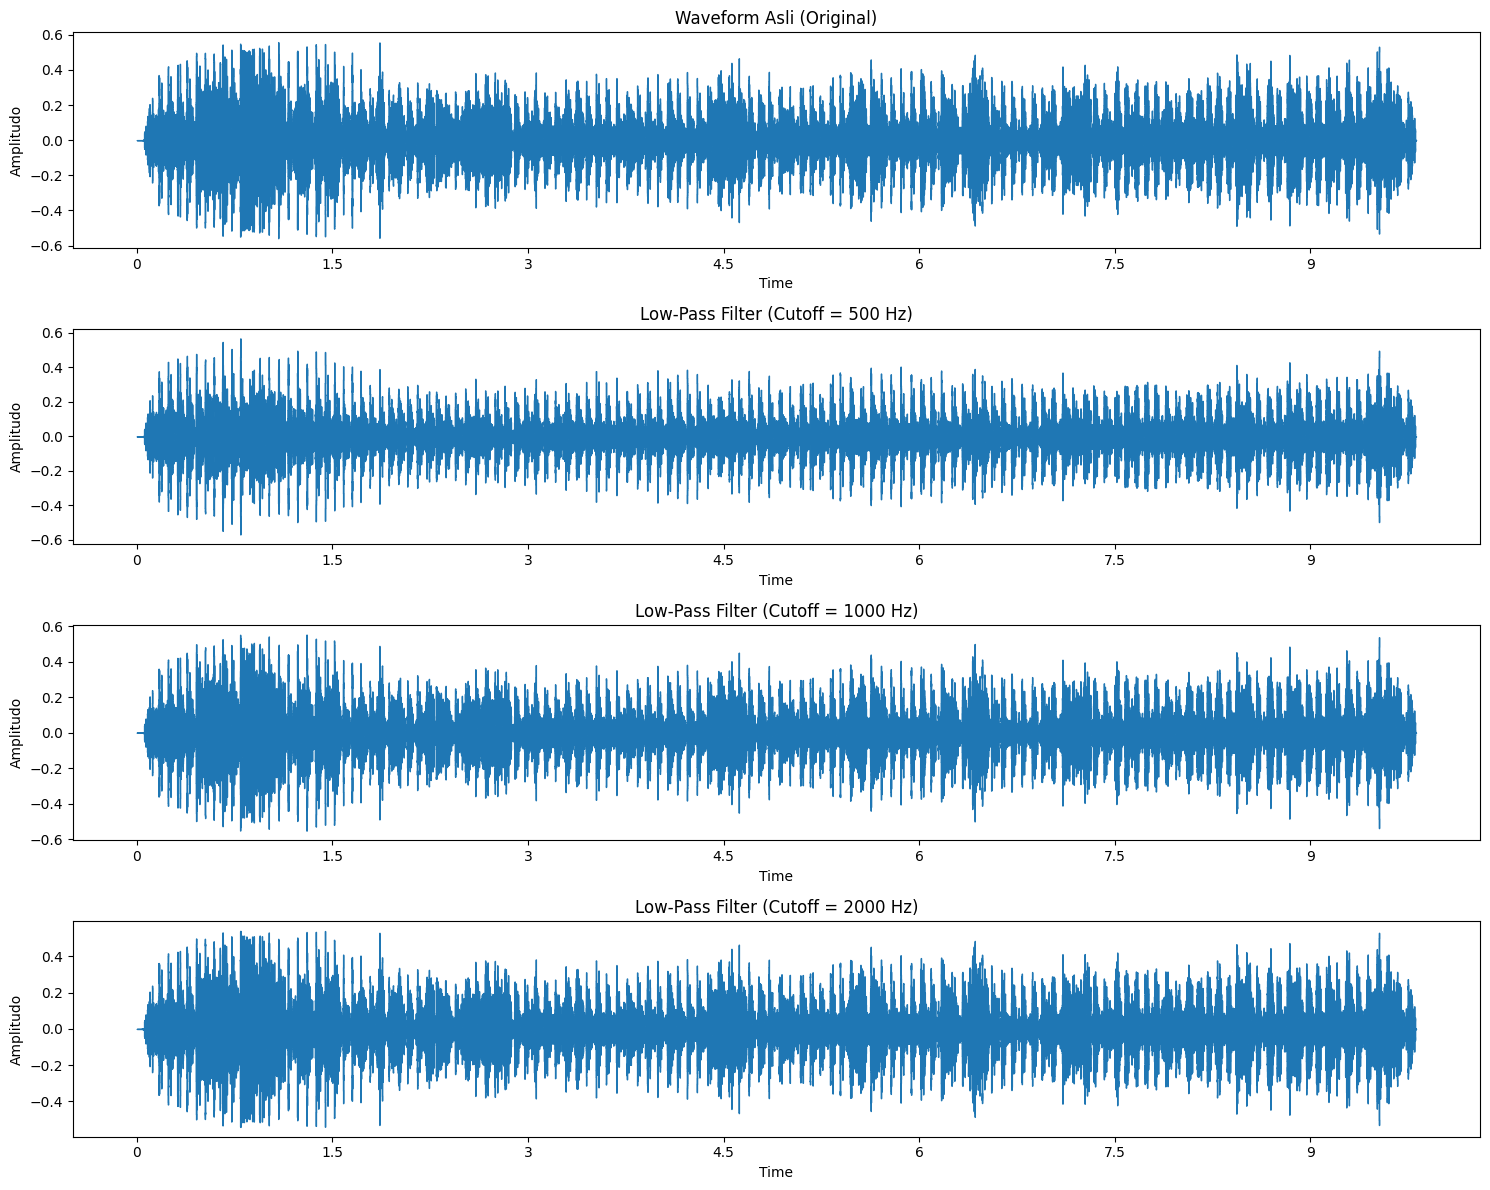

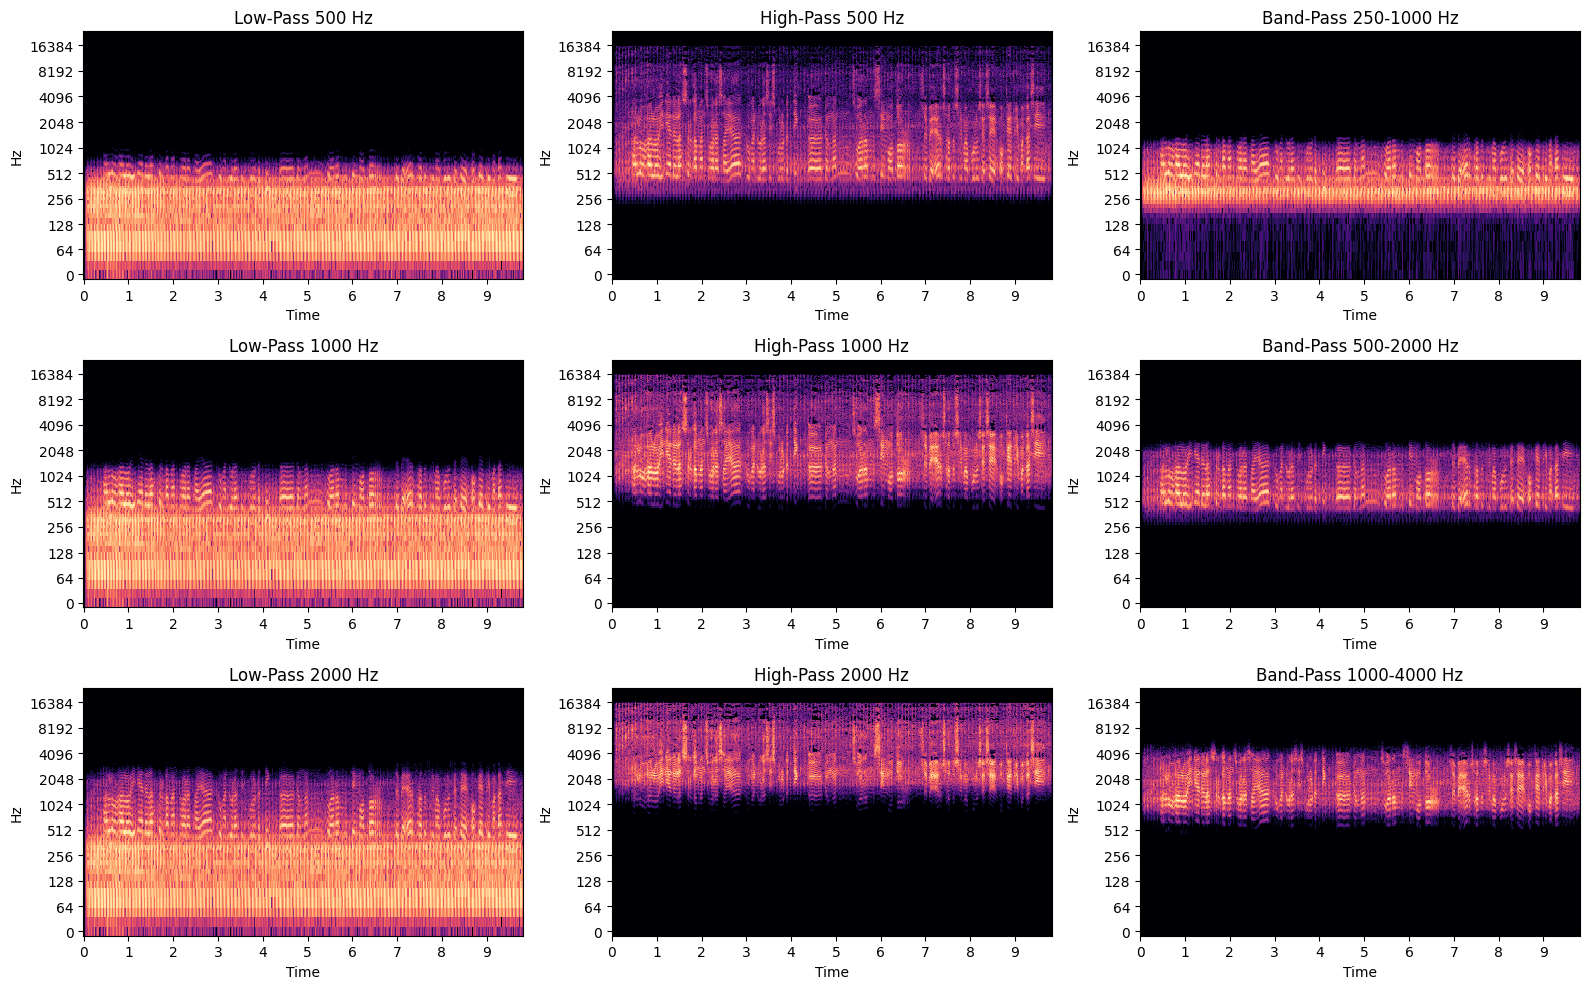

In [14]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import butter,filtfilt


audioSoal2 = os.path.join('dataset', 'soal2.wav')
y, sr = librosa.load(audioSoal2, sr=None)
y = y[:sr * 10] 
y = np.asarray(y, dtype=np.float64)

def butter_filter(y, sr, cutoff=None, btype='low', band=None, order=5):
    y = np.asarray(y, dtype=np.float64)
    nyquist = 0.5 * sr
    if btype == 'band':
        low, high = band
        low /= nyquist
        high /= nyquist
        b, a = butter(order, [low, high], btype='band')
    else:
        normal_cutoff = cutoff / nyquist
        b, a = butter(order, normal_cutoff, btype=btype)
    return filtfilt(b, a, y)

cutoff_values = [500, 1000, 2000]
Hasil = 'dataset'
os.makedirs(Hasil, exist_ok=True)
plt.figure(figsize=(15, 12))

# Waveform asli
plt.subplot(4, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform Asli (Original)")
plt.ylabel("Amplitudo")

# Eksperimen dengan beberapa cutoff
for i, cutoff in enumerate(cutoff_values, start=2):
    y_low = butter_filter(y, sr, cutoff=cutoff, btype='low')
    plt.subplot(4, 1, i)
    librosa.display.waveshow(y_low, sr=sr)
    plt.title(f"Low-Pass Filter (Cutoff = {cutoff} Hz)")
    plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()

fig, axs = plt.subplots(3, 3, figsize=(16, 10))
axs = axs.ravel()

def plot_spec(ax, signal, sr, title):
    S = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    img = librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.set_title(title)
    return img

row = 0
for cutoff in cutoff_values:
    # Low-pass
    y_low = butter_filter(y, sr, cutoff=cutoff, btype='low')
    plot_spec(axs[row*3 + 0], y_low, sr, f"Low-Pass {cutoff} Hz")
    sf.write(os.path.join(Hasil, f'lowpass_{cutoff}Hz.wav'), y_low, sr)

    # High-pass
    y_high = butter_filter(y, sr, cutoff=cutoff, btype='high')
    plot_spec(axs[row*3 + 1], y_high, sr, f"High-Pass {cutoff} Hz")
    sf.write(os.path.join(Hasil, f'highpass_{cutoff}Hz.wav'), y_high, sr)

    # Band-pass
    band = [cutoff/2, cutoff*2]  # misal: 250–1000 Hz, 500–2000 Hz, 1000–4000 Hz
    y_band = butter_filter(y, sr, btype='band', band=band)
    plot_spec(axs[row*3 + 2], y_band, sr, f"Band-Pass {band[0]:.0f}-{band[1]:.0f} Hz")
    sf.write(os.path.join(Hasil, f'bandpass_{int(band[0])}-{int(band[1])}Hz.wav'), y_band, sr)

    row += 1

plt.tight_layout()
plt.show()

**Analisis :**  Sumber noise utama berasal dari suara knalpot motor bising. Dalam percobaan ini, digunakan tiga nilai frekuensi cutoff untuk low-pass dan high-pass filter, yaitu 500 Hz, 1000 Hz, dan 2000 Hz, serta dua rentang frekuensi untuk band-pass filter, yaitu 250-1000 Hz, 500-2000 dan 1000-4000 Hz. dari hasil eksperimen, filter yang paling efektif dalam mereduksi noise knalpot bising adalah high-pass pada 500 Hz dan band-pass pada 500-2000 Hz. Ketika menggunakan low-pass filter, suara vokal justru menjadi lebih pelan sementara suara knalpot bising tidak teredam dengan baik.

### Soal 3
- Lakukan pitch shifting pada rekaman suara Soal 1 untuk membuat suara terdengar seperti chipmunk (dengan mengubah pitch ke atas).
- Visualisasikan waveform dan spektrogram sebelum dan sesudah pitch shifting.
- Jelaskan proses pitch shifting yang Anda lakukan, termasuk:
    - Parameter yang digunakan
    - Perbedaan dalam representasi visual antara suara asli dan suara yang telah dimodifikasi
    - Bagaimana perubahan pitch memengaruhi kualitas dan kejelasan suara
- Gunakan dua buat pitch tinggi, misalnya pitch +7 dan pitch +12.
- Gabungkan kedua rekaman yang telah di-pitch shift ke dalam satu file audio. (Gunakan ChatGPT / AI untuk membantu Anda dalam proses ini)

Pitch-shifted audio saved to: dataset\Pitch+12.wav


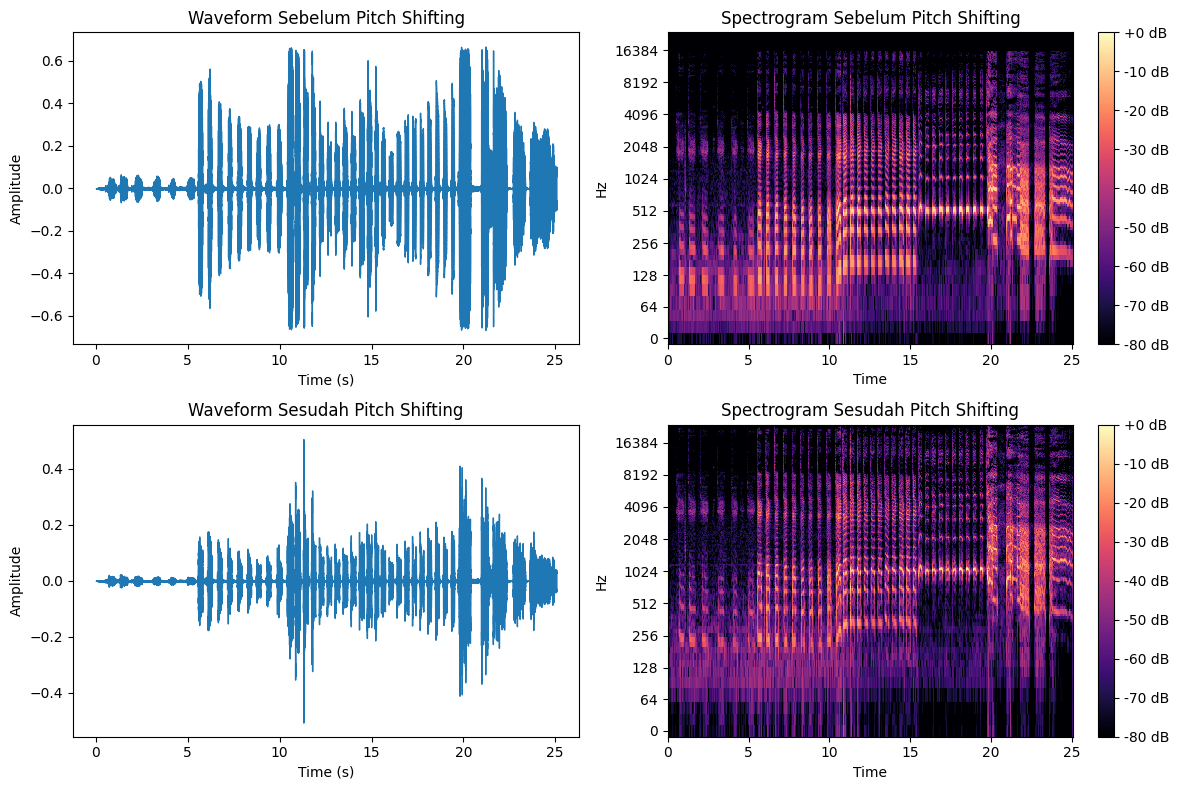

In [ ]:
import librosa
import numpy as np
import os
import soundfile as sf
import librosa.display
import matplotlib.pyplot as plt

audioSoal3 = os.path.join('dataset', 'soal1.wav')
y, sr = librosa.load(audioSoal3, sr=None)

y_pitch_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)
#+12
pitch_shifted_file = os.path.join('dataset', 'Pitch+12.wav')
sf.write(pitch_shifted_file, y_pitch_shifted, sr)
print(f"Pitch-shifted audio saved to: {pitch_shifted_file}")

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform Sebelum Pitch Shifting')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Sebelum Pitch Shifting')

plt.subplot(2, 2, 3)
librosa.display.waveshow(y_pitch_shifted, sr=sr)
plt.title('Waveform Sesudah Pitch Shifting')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
D_pitch_shifted = librosa.amplitude_to_db(np.abs(librosa.stft(y_pitch_shifted)), ref=np.max)
librosa.display.specshow(D_pitch_shifted, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Sesudah Pitch Shifting')
plt.tight_layout()
plt.show()

# +7 semitone = perfect fifth
y_pitch_7 = librosa.effects.pitch_shift(y, sr=sr, n_steps=7)
y_pitch_7_file = os.path.join('dataset', 'Pitch+7.wav')
sf.write(y_pitch_7_file, y_pitch_7, sr)

# +12 semitone = satu oktaf
y_pitch_12 = librosa.effects.pitch_shift(y, sr=sr, n_steps=12)
y_pitch_12_file = os.path.join('dataset', 'Pitch+12.wav')
sf.write(y_pitch_12_file, y_pitch_12, sr)

min_len = min(len(y_pitch_7), len(y_pitch_12))
y_pitch_7 = y_pitch_7[:min_len]
y_pitch_12 = y_pitch_12[:min_len]

y_mix = (y_pitch_7 + y_pitch_12) / 2.0 
y_mix = y_mix / np.max(np.abs(y_mix))
y_mix_file = os.path.join('dataset', 'HasilNo3 (sesudah digabung).wav')
sf.write(y_mix_file, y_mix, sr)

**Analisis :** Pada proses pitch shifting, terdapat beberapa parameter penting yang digunakan. Parameter pertama adalah y, yaitu array NumPy yang berisi data sinyal audio. Parameter kedua adalah sr (sample rate), yang menunjukkan jumlah sampel audio per detik. Parameter ketiga adalah n_steps, yaitu jumlah pergeseran nada dalam satuan semitone. Nilai n_steps = 12 berarti pitch dinaikkan sebanyak 12 semitone atau setara dengan satu oktaf. Jika nilai n_steps diberi tanda negatif, maka pitch akan diturunkan sebesar jumlah semitone tersebut. perbedaan antara audio asli dan hasil pitch shifting terlihat jelas. Waveform audio asli memiliki gelombang dengan periode yang relatif merata, sedangkan waveform hasil pitch naik tampak lebih padat karena peningkatan pitch membuat frekuensi menjadi lebih tinggi semakin tinggi frekuensi, semakin rapat pula gelombangnya. 
Pada Spectogram, setelah dilakukan pitch shifting ke atas, seluruh komponen frekuensi bergeser naik, sehingga bagian warna terang tampak berpindah ke area frekuensi yang lebih tinggi dan sedikit menggelap. Meskipun demikian, pola bentuk antara kedua spektrogram masih terlihat serupa.

### Soal 4
- Lakukan processing pada rekaman yang sudah di-pitch shift pada Soal 3 dengan tahapan:
    - Equalizer
    - gain/fade
    - Normalization
    - Compression
    - Noise Gate
    - Silence trimming
- Atur nilai target loudness ke -16 LUFS.
- Visualisasikan waveform dan spektrogram sebelum dan sesudah proses normalisasi.
- Jelaskan:
    - Perubahan dinamika suara yang terjadi
    - Perbedaan antara normalisasi peak dan normalisasi LUFS
    - Bagaimana kualitas suara berubah setelah proses normalisasi dan loudness optimization
    - Kelebihan dan kekurangan dari pengoptimalan loudness dalam konteks rekaman suara

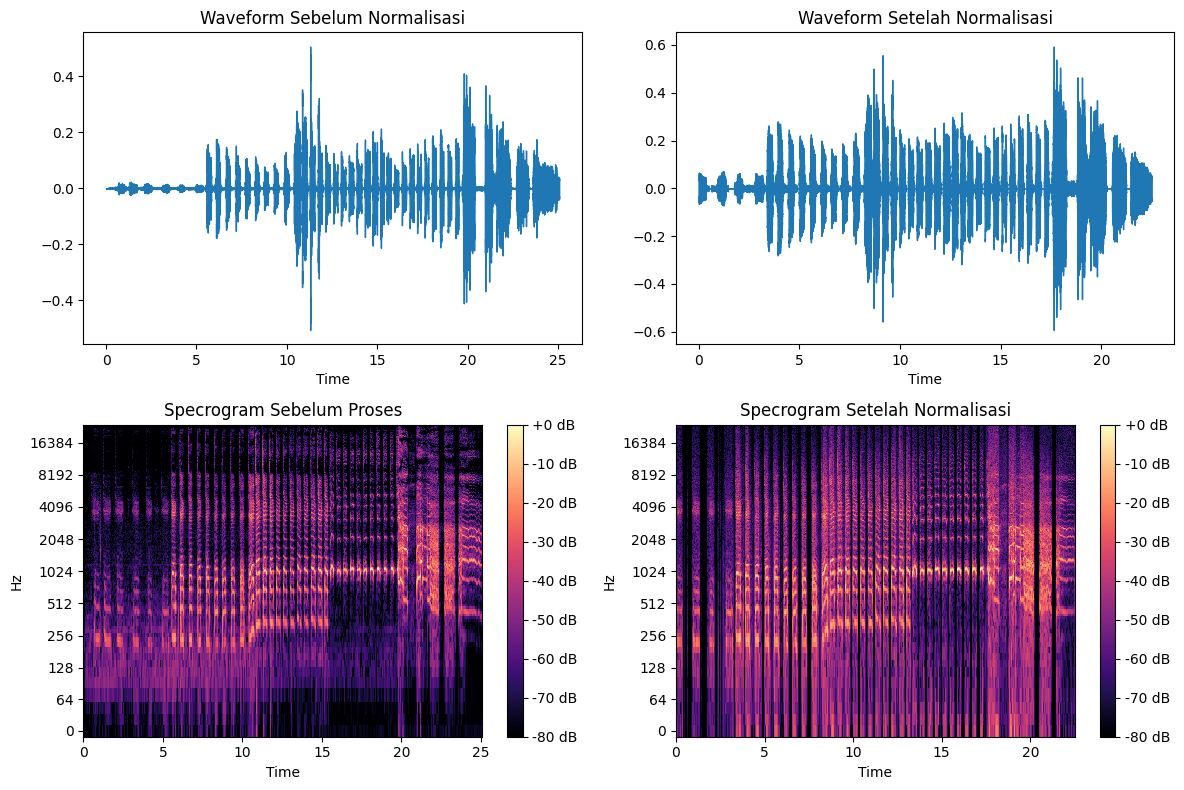

In [12]:
import os
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

audioSoal4 = os.path.join('dataset', 'Pitch+12.wav')
y, sr = librosa.load(audioSoal4, sr=None)
OG = y.copy()

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    return lfilter(b, a, data)

# Gain/Fade
y = bandpass(y, 100, 10000, sr)
fade_in_time = 3  # detik
fade_out_time = 3
fade_in_samples = int(sr * fade_in_time)
fade_out_samples = int(sr * fade_out_time)

fade_in = np.linspace(0.0, 1.0, fade_in_samples)
fade_out = np.linspace(1.0, 0.0, fade_out_samples)

y[:fade_in_samples] *= fade_in
y[-fade_out_samples:] *= fade_out

# Normalisasi Ke-16 LUFS

def normalize_lufs(signal, target_lufs=-16.0):
    rms = np.sqrt(np.mean(signal**2))
    current_lufs = 20 * np.log10(rms) if rms > 0 else -np.inf
    gain_db = target_lufs - current_lufs
    gain = 10 ** (gain_db / 20)
    return signal * gain

y = normalize_lufs(y, target_lufs=-16.0)

# Compression 
def compression(signal, threshold_db=-20.0, ratio=4.0):
    threshold = 10 ** (threshold_db / 20)
    compressed_signal = np.copy(signal)
    for i in range(len(signal)):
        if abs(signal[i]) > threshold:
            excess = abs(signal[i]) - threshold
            compressed_excess = excess / ratio
            compressed_signal[i] = np.sign(signal[i]) * (threshold + compressed_excess)
    return compressed_signal

y = compression(y, threshold_db=-20.0, ratio=4.0)

# Noise
def noise(signal, threshold_db=-40.0):
    threshold = 10 ** (threshold_db / 20)
    gated_signal = np.where(np.abs(signal) < threshold, 0, signal)
    return gated_signal

y = noise(y, threshold_db=-40.0)

# Slice Trimming
y, _ = librosa.effects.trim(y, top_db=20)

Hasil = os.path.join('dataset', "HasilNo4.wav")
sf.write(Hasil, y, sr)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
librosa.display.waveshow(OG, sr=sr, ax=axs[0,0])
axs[0,0].set_title("Waveform Sebelum Normalisasi")

librosa.display.waveshow(y, sr=sr, ax=axs[0,1])
axs[0,1].set_title("Waveform Setelah Normalisasi")

D1 = librosa.amplitude_to_db(np.abs(librosa.stft(OG)), ref=np.max)
img1 = librosa.display.specshow(D1, sr=sr, x_axis='time', y_axis='log', ax=axs[1,0])
axs[1,0].set_title("Specrogram Sebelum Proses")
fig.colorbar(img1, ax=axs[1,0], format="%+2.f dB")

D2 = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img2 = librosa.display.specshow(D2, sr=sr, x_axis='time', y_axis='log', ax=axs[1,1])
axs[1,1].set_title("Specrogram Setelah Normalisasi")
fig.colorbar(img2, ax=axs[1,1], format="%+2.f dB")

plt.tight_layout()
plt.show()

**Analisis :** Tahapan pertama adalah penerapan band-pass filter pada rentang frekuensi 100–10.000 Hz untuk melewatkan frekuensi yang relevan dengan suara manusia dan dapat menghilangkan noise pada frekuensi rendah dan tinggi. Proses ini bertujuan untuk menjaga kejernihan suara sebelum dilakukan normalisasi. Selanjutnya diterapkan efek fade-in dan fade-out selama tiga detik di awal dan akhir audio untuk membuat transisi suara lebih halus dan menghindari munculnya bunyi tiba-tiba pada permulaan atau penutupan rekaman. normalisasi loudness menggunakan pendekatan LUFS dengan –16 dB. normalisasi LUFS menyesuaikan rata-rata tingkat kekerasan suara agar lebih konsisten di seluruh bagian audio, sehingga menghasilkan amplitudo yang lebih stabil dan seimbang. Setelah itu dilakukan kompresi dinamis dengan ambang –20 dB dan rasio 4:1 untuk mengurangi perbedaan antara bagian suara keras dan lembut. Proses ini membantu menjaga agar suara tetap jelas dan tidak memiliki variasi volume yang terlalu ekstrem. Tahap berikutnya adalah noise gating, yang berfungsi menekan sinyal di bawah ambang –40 dB sehingga bagian senyap atau noise halus dapat dihilangkan tanpa mengganggu suara utama. lalu langkat terakhir adalah trimming yaitu memotong bagian awal dan akhir durasi.  

### Soal 5
- Pilih 2 buah (potongan) lagu yang memiliki vokal (penyanyi) dan berdurasi sekitar 1 menit:
    - Lagu 1: Nuansa sedih, lambat
    - Lagu 2: Nuansa ceria, cepat
- Konversikan ke format WAV sebelum dimuat ke notebook ini.
- Lakukan deteksi tempo (BPM) dan estimasi kunci (key) dari masing-masing lagu dan berikan analisis singkat.
- Lakukan remix terhadap kedua lagu:
    - **Time Stretch**: Samakan tempo kedua lagu 
    - **Pitch Shift**: Samakan kunci (key) kedua lagu
    - **Crossfading**: Gabungkan kedua lagu dengan efek crossfading
    - **Filter Tambahan**: Tambahkan filter kreatif sesuai keinginan (opsional)
- Jelaskan proses dan parameter yang digunakan
- Tampilkan waveform dan spektrogram sesudah remix
- Jelaskan hasil remix yang telah dilakukan

In [29]:
import os
import librosa
import soundfile as sf
import numpy as np

y1, sr1 = librosa.load('dataset/NuansaCeria.wav', sr=None)
y2, sr2 = librosa.load('dataset/NuansaSedih.wav', sr=None)

tempo1, _ = librosa.beat.beat_track(y=y1, sr=sr1)
tempo2, _ = librosa.beat.beat_track(y=y2, sr=sr2)

tempo1 = float(tempo1)
tempo2 = float(tempo2)

print(f"Tempo Lagu 1: {tempo1:.2f} BPM")
print(f"Tempo Lagu 2: {tempo2:.2f} BPM")

chroma1 = librosa.feature.chroma_cqt(y=y1, sr=sr1)
chroma2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)

notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

key1 = np.argmax(np.mean(chroma1, axis=1))
key2 = np.argmax(np.mean(chroma2, axis=1))

note1 = notes[key1]
note2 = notes[key2]

print(f"Kunci Lagu 1: {note1}")
print(f"Kunci Lagu 2: {note2}")


C:\Users\User\AppData\Local\Temp\ipykernel_688\1137267693.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo1 = float(tempo1)
C:\Users\User\AppData\Local\Temp\ipykernel_688\1137267693.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo2 = float(tempo2)


Tempo Lagu 1: 117.45 BPM
Tempo Lagu 2: 71.78 BPM
Kunci Lagu 1: G#
Kunci Lagu 2: F#


**Analisis :** Pada lagu ceria, memiliki tempo dengan 117.45 BPM dengan kunci G#, sedangkan Pada lagu sedih memiliki tempu dengan 71.78 BPM dengan kunci F#

tempo dihitung dengan analisis beat tracking dari pola ketukan audio, sedangkan Estimasi kunci lagu (key detection) dilakukan menggunakan fitur Chroma CQT (Constant-Q Transform)

In [30]:
import os
import librosa
import soundfile as sf
import numpy as np

y1, sr1 = librosa.load('dataset/NuansaCeria.wav', sr=None)
y2, sr2 = librosa.load('dataset/NuansaSedih.wav', sr=None)

tempo1, _ = librosa.beat.beat_track(y=y1, sr=sr1)
tempo2, _ = librosa.beat.beat_track(y=y2, sr=sr2)

tempo1 = float(tempo1)
tempo2 = float(tempo2)

print(f"Tempo Lagu 1: {tempo1:.2f} BPM")
print(f"Tempo Lagu 2: {tempo2:.2f} BPM")

chroma1 = librosa.feature.chroma_cqt(y=y1, sr=sr1)
chroma2 = librosa.feature.chroma_cqt(y=y2, sr=sr2)

notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

key1 = np.argmax(np.mean(chroma1, axis=1))
key2 = np.argmax(np.mean(chroma2, axis=1))

note1 = notes[key1]
note2 = notes[key2]

print(f"Kunci Lagu 1: {note1}")
print(f"Kunci Lagu 2: {note2}")

# Menyamakan Tempo
rate = tempo1 / tempo2
y2_matched_tempo = librosa.effects.time_stretch(y2, rate=rate)
print(f"Lagu 2 diubah dengan faktor {rate:.3f} untuk menyamakan tempo.")

# Menyamakan Kunci 
diff_semitones = key1 - key2
y2_matched_pitch = librosa.effects.pitch_shift(y2_matched_tempo, sr=sr2, n_steps=diff_semitones)
print(f"Kunci Lagu 2 dinaikkan {diff_semitones:+} semitone untuk match Lagu 1.")

# Resampling
if sr1 != sr2:
    y2_matched_pitch = librosa.resample(y2_matched_pitch, orig_sr=sr2, target_sr=sr1)
    sr = sr1
else:
    sr = sr1

# Crossfade

crossfade_duration = 5.0  # detik
crossfade_samples = int(sr * crossfade_duration)

# Pastikan panjang lagu cukup
if len(y1) > crossfade_samples and len(y2_matched_pitch) > crossfade_samples:
    fade_out = np.linspace(1.0, 0.0, crossfade_samples)
    fade_in  = np.linspace(0.0, 1.0, crossfade_samples)

    y1_end = y1[-crossfade_samples:] * fade_out
    y2_start = y2_matched_pitch[:crossfade_samples] * fade_in

    crossfade_mix = y1_end + y2_start
    y_final = np.concatenate((y1[:-crossfade_samples], crossfade_mix, y2_matched_pitch[crossfade_samples:]))
else:
    y_final = np.concatenate((y1, y2_matched_pitch))  # fallback tanpa crossfade


sf.write('dataset/Mix_Ceria_Sedih.wav', y_final, sr)


C:\Users\User\AppData\Local\Temp\ipykernel_688\3547940482.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo1 = float(tempo1)
C:\Users\User\AppData\Local\Temp\ipykernel_688\3547940482.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tempo2 = float(tempo2)


Tempo Lagu 1: 117.45 BPM
Tempo Lagu 2: 71.78 BPM
Kunci Lagu 1: G#
Kunci Lagu 2: F#
Lagu 2 diubah dengan faktor 1.636 untuk menyamakan tempo.
Kunci Lagu 2 dinaikkan +2 semitone untuk match Lagu 1.


**Analisis :** Proses remix dimulai dari menyamakan tempo dan kunci lagu kedua (NuansaSedih) agar sesuai dengan lagu pertama (NuansaCeria). Parameter y merupakan array amplitudo sinyal, sedangkan sr menunjukkan sample rate audio. estimasi kunci lagu dihitung menggunakan chroma feature. Rasio tempo (rate = tempo1 / tempo2) digunakan untuk menentukan seberapa besar perubahan tempo yang dibutuhkan agar lagu kedua memiliki tempo yang sama dengan lagu pertama. Selanjutnya, pitch lagu kedua disesuaikan menggunakan perbedaan semitone antara kedua lagu (diff_semitones = key1 - key2).

Setelah tempo dan kunci disamakan, dilakukan resampling agar kedua lagu memiliki sample rate yang sama sebelum proses penggabungan. Efek crossfade diterapkan dengan durasi 5 detik untuk menghasilkan transisi yang halus antara dua lagu. fade_in dan fade_out digunakan untuk mengatur perubahan volume secara bertahap pada bagian tumpang tindih (overlap) Hasil akhirnya adalah audio remix yang mulus dengan tempo dan kunci yang seragam. hal ini mirip seperti transisi para apple music yang terbaru (Versi kurang mulus)

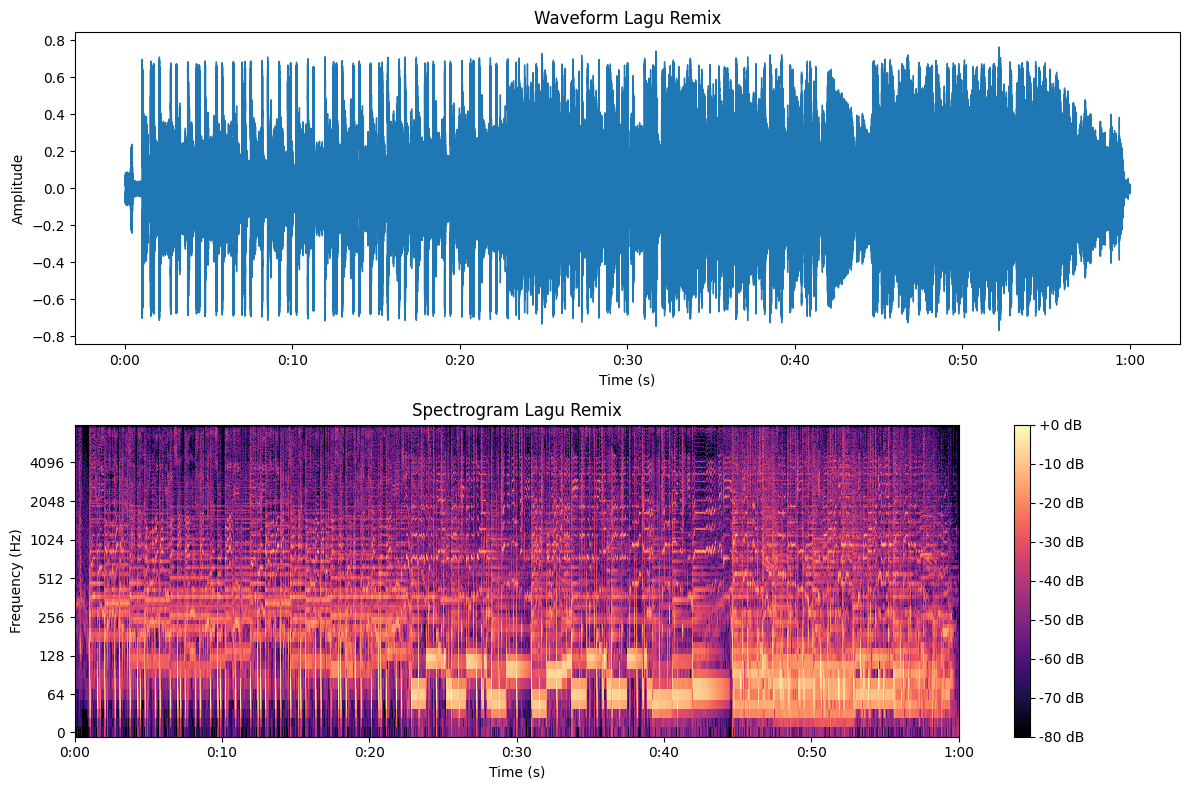

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

remix_file = os.path.join('dataset', 'Mix_Ceria_Sedih.wav')

y_remix, sr_remix = librosa.load(remix_file, sr=16000, duration=60)  # ambil 60 detik pertama
y_remix = y_remix.astype(np.float32)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y_remix, sr=sr_remix, max_points=100000)  # 👈 limit jumlah titik
plt.title('Waveform Lagu Remix')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
D_remix = librosa.stft(y_remix, n_fft=1024, hop_length=512)
S_db = librosa.amplitude_to_db(np.abs(D_remix), ref=np.max)

librosa.display.specshow(S_db, sr=sr_remix, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram Lagu Remix')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()


**Analisis :** Proses remix dilakukan dengan menyelaraskan tempo dan kunci nada dari dua lagu, kemudian menggabungkannya menggunakan efek crossfade agar transisi antar lagu terdengar mulus. Tempo lagu kedua disesuaikan dengan tempo lagu pertama berdasarkan rasio perbandingan nilai tempo keduanya. Selanjutnya, pitch lagu kedua diubah sesuai selisih semitone antara kedua lagu agar keduanya memiliki kunci nada yang sama. Setelah itu dilakukan pengecekan sample rate untuk memastikan kedua lagu memiliki kecepatan pemutaran yang identik. Tahap berikutnya adalah menentukan durasi crossfade, yang mengatur panjang waktu transisi antar lagu. Efek fade-in dan fade-out diterapkan agar volume lagu pertama menurun secara bertahap sementara volume lagu kedua meningkat secara halus. Terakhir, bagian awal lagu pertama, campuran crossfade, dan kelanjutan lagu kedua digabungkan menjadi satu file audio remix yang memiliki tempo dan nada seragam.

## Referensi : 
- [ChatGPT](https://chatgpt.com/share/68f267ca-e7e8-800b-b627-c158cf767a4e)
- [Tulus - Hati hati dijalan](https://www.youtube.com/watch?v=_N6vSc_mT6I&list=RD_N6vSc_mT6I&start_radio=1)
- [GAC - Bahagia](https://www.youtube.com/watch?v=zDHOW9PdQYE&list=RDzDHOW9PdQYE&start_radio=1)